Падалко Богдан.
Задание №3 - Классификация методом линейной регрессии для 2 классов (метод наименьших квадратов).

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)
limit_to_2D = True

Я использовал датасет "Ирисы Фишера".

In [2]:
iris = datasets.load_iris()
X = iris.data 
target = iris.target 
names = iris.target_names
df_original = pd.DataFrame(X, columns = iris.feature_names)
df_original['species'] = iris.target
if limit_to_2D:
    df_original.drop(df_original.columns[np.random.randint(len(df_original.columns)-1)], axis = 1, inplace = True)
    df_original.drop(df_original.columns[np.random.randint(len(df_original.columns)-1)], axis = 1, inplace = True)
display(df_original)

,sepal width (cm),petal width (cm),species
0,3.5,0.2,0
1,3.0,0.2,0
2,3.2,0.2,0
3,3.1,0.2,0
4,3.6,0.2,0
...,...,...,...
145,3.0,2.3,2
146,2.5,1.9,2
147,3.0,2.0,2
148,3.4,2.3,2


In [3]:
df = df_original.copy()
df['species'].replace(to_replace = [0, 1, 2], value = [-1, 1, 1], inplace = True)
display(df)

,sepal width (cm),petal width (cm),species
0,3.5,0.2,-1
1,3.0,0.2,-1
2,3.2,0.2,-1
3,3.1,0.2,-1
4,3.6,0.2,-1
...,...,...,...
145,3.0,2.3,1
146,2.5,1.9,1
147,3.0,2.0,1
148,3.4,2.3,1


In [4]:
data_mean = np.zeros((2, df.shape[1]))
for i in range(0, 2):
    data_mean[i, -1] = 2*i-1
    for j in range(0, data_mean.shape[1]-1):
        data_mean[i, j] = df[df['species'] == data_mean[i, data_mean.shape[1]-1]].iloc[:, j].mean()
print(data_mean)
data_mean = np.delete(data_mean, -1, axis = 1)

[[ 3.428  0.246 -1.   ]
 [ 2.872  1.676  1.   ]]


In [5]:
def Diff_Square_Distance(x, y, l, alpha):
    f = np.zeros(l.shape)
    for i in range(0, x.shape[0]):
        temp = np.dot(l, x[i])
        temp = np.sign(temp)
        temp = temp-y[i]
        temp = temp*x[i]
        f = f+temp
    f = f+alpha*l
    f = 2.0*f
    return f

In [6]:
max_iterations = 100
eps = 0.001
alpha = 2.0

In [7]:
x = df.drop('species', axis = 1).values.astype(float)
y = df['species'].values

In [8]:
def LSM_Classification(x, y, init):
    i = 0
    l = init[0]-init[1]
    l = l/np.linalg.norm(l)
    print("Начальное значение l:", l)
    while i < max_iterations:
        i += 1
        h = 1.0/np.power(i, alpha)
        old_l = np.copy(l)
        f = Diff_Square_Distance(x, y, l, alpha)
        l = l-h*f
        l = l/np.linalg.norm(l)
        if np.linalg.norm(l-old_l) <= eps:
            break
    print("Пройдено итераций при обучении: "+str(i)+".")
    return l
def LSM_Predict(x, l):
    y = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        y[i] = np.dot(l, x[i])
        y[i] = np.sign(y[i])
    return y

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 2, shuffle = True)

In [10]:
w0_12 = LSM_Classification(x_train, y_train, data_mean)

Начальное значение l: [ 0.36238336 -0.93202913]
Пройдено итераций при обучении: 24.


In [11]:
print("Конечное значение l:", w0_12)
y_predict = LSM_Predict(x_test, w0_12)
print("Точность: "+str(int(accuracy_score(y_test, y_predict)*100))+"%.")

Конечное значение l: [-0.21330757  0.9769851 ]
Точность: 100%.


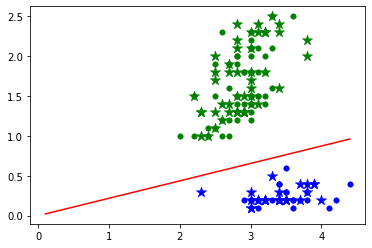

In [12]:
fig = plt.figure()
for i in range(x_train.shape[0]):
    if y_train[i] == -1:
        plt.scatter(x_train[i][0], x_train[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'blue') #Тренировочная выборка класса 0.
    else:
        plt.scatter(x_train[i][0], x_train[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'green') #Тренировочная выборка класса 1 или 2.
for i in range(x_test.shape[0]):
    if y_predict[i] == -1:
        if y_predict[i] != y_test[i]:
            plt.scatter(x_test[i][0], x_test[i][1], s = 120, marker = '*', linewidths = 0.5, color = 'darkblue') #Ошибочное распознание как класс 0.
        else:
            plt.scatter(x_test[i][0], x_test[i][1], s = 120, marker = '*', linewidths = 0.5, color = 'blue') #Правильное распознание как класс 1 или 2.
    else:
        if y_predict[i] != y_test[i]:
            plt.scatter(x_test[i][0], x_test[i][1], s = 120, marker = '*', linewidths = 0.5, color = 'darkgreen') #Ошибочное распознание как класс 0.
        else:
            plt.scatter(x_test[i][0], x_test[i][1], s = 120, marker = '*', linewidths = 0.5, color = 'green') #Правильное распознание как класс 1 или 2.
if limit_to_2D:
    y_func = lambda x, l: (-1.0*l[0]*x)/l[1]
    x_min = np.amin(x)
    x_max = np.amax(x)
    plt.plot([x_min, x_max], [y_func(x_min, w0_12), y_func(x_max, w0_12)], color = 'red')

Задание №4 - Модификация классификации методом наименьших квадратов для 3 классов.

В данный момент один из классов представляет собой объединение двух классов. Для построения полной классификации ирисов Фишера разъединим эти 2 класса (а если точнее - удалим из исходного датасета данные об одном классе) и построим решающее правило методом гиперплоскостей только для них. Классы закодируем числами -1 и 1 как и в предыдущем задании.

In [13]:
df = df_original.copy()
df.drop(df.loc[df['species'] == 0].index, inplace = True)
df['species'].replace(to_replace = [1, 2], value = [-1, 1], inplace = True)
display(df)

,sepal width (cm),petal width (cm),species
50,3.2,1.4,-1
51,3.2,1.5,-1
52,3.1,1.5,-1
53,2.3,1.3,-1
54,2.8,1.5,-1
...,...,...,...
145,3.0,2.3,1
146,2.5,1.9,1
147,3.0,2.0,1
148,3.4,2.3,1


In [14]:
x = df.drop('species', axis = 1).values.astype(float)
y = df['species'].values

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 2, shuffle = True)

In [16]:
data_mean = np.zeros((2, df.shape[1]))
for i in range(0, 2):
    data_mean[i, -1] = 2*i-1
    for j in range(0, data_mean.shape[1]-1):
        data_mean[i, j] = df[df['species'] == data_mean[i, data_mean.shape[1]-1]].iloc[:, j].mean()
print(data_mean)
data_mean = np.delete(data_mean, -1, axis = 1)

[[ 2.77   1.326 -1.   ]
 [ 2.974  2.026  1.   ]]


In [17]:
w1_2 = LSM_Classification(x_train, y_train, data_mean)

Начальное значение l: [-0.27978933 -0.96006142]
Пройдено итераций при обучении: 61.


In [18]:
print("Конечное значение l:", w1_2)
y_predict = LSM_Predict(x_test, w1_2)
print("Точность: "+str(int(accuracy_score(y_test, y_predict)*100))+"%.")

Конечное значение l: [-0.49187061  0.87066831]
Точность: 88%.


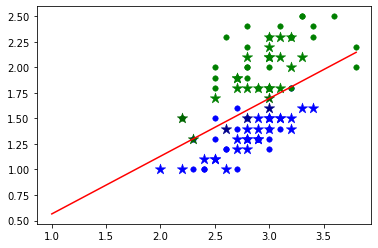

In [19]:
fig = plt.figure()
for i in range(x_train.shape[0]):
    if y_train[i] == -1:
        plt.scatter(x_train[i][0], x_train[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'blue') #Тренировочная выборка класса 1.
    else:
        plt.scatter(x_train[i][0], x_train[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'green') #Тренировочная выборка класса 2.
for i in range(x_test.shape[0]):
    if y_predict[i] == -1:
        if y_predict[i] != y_test[i]:
            plt.scatter(x_test[i][0], x_test[i][1], s = 120, marker = '*', linewidths = 0.5, color = 'darkblue') #Ошибочное распознание как класс 1.
        else:
            plt.scatter(x_test[i][0], x_test[i][1], s = 120, marker = '*', linewidths = 0.5, color = 'blue') #Правильное распознание как класс 1.
    else:
        if y_predict[i] != y_test[i]:
            plt.scatter(x_test[i][0], x_test[i][1], s = 120, marker = '*', linewidths = 0.5, color = 'darkgreen') #Ошибочное распознание как класс 2.
        else:
            plt.scatter(x_test[i][0], x_test[i][1], s = 120, marker = '*', linewidths = 0.5, color = 'green') #Правильное распознание как класс 2.
if limit_to_2D:
    y_func = lambda x, l: (-1.0*l[0]*x)/l[1]
    x_min = np.amin(x)
    x_max = np.amax(x)
    plt.plot([x_min, x_max], [y_func(x_min, w1_2), y_func(x_max, w1_2)], color = 'red')

Используя оба найденных решающих правила, применим их ко всему датасету.

In [20]:
df = df_original.copy()
display(df)

,sepal width (cm),petal width (cm),species
0,3.5,0.2,0
1,3.0,0.2,0
2,3.2,0.2,0
3,3.1,0.2,0
4,3.6,0.2,0
...,...,...,...
145,3.0,2.3,2
146,2.5,1.9,2
147,3.0,2.0,2
148,3.4,2.3,2


In [21]:
x = df.drop('species', axis = 1).values.astype(float)
y = df['species'].values

Итоговая точность разделения: 92%.


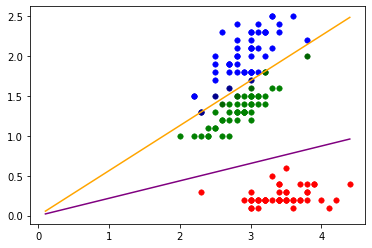

In [22]:
y_predict_first = LSM_Predict(x, w0_12)
y_predict_second = LSM_Predict(x, w1_2)
fig = plt.figure()
for i in range(x.shape[0]):
    if y_predict_first[i] == -1:
        if y[i] != 0:
            plt.scatter(x[i][0], x[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'darkred') #Ошибочное распознание как класс 0.
        else:
            plt.scatter(x[i][0], x[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'red') #Правильное распознание как класс 0.
    else:
        if y_predict_second[i] == -1:
            if y[i] != 1:
                plt.scatter(x[i][0], x[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'darkgreen') #Ошибочное распознание как класс 1.
            else:
                plt.scatter(x[i][0], x[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'green') #Правильное распознание как класс 1.
        else:
            if y[i] != 2:
                plt.scatter(x[i][0], x[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'darkblue') #Ошибочное распознание как класс 2.
            else:
                plt.scatter(x[i][0], x[i][1], s = 120, marker = '.', linewidths = 0.5, color = 'blue') #Правильное распознание как класс 2.
if limit_to_2D:
    y_func = lambda x, l: (-1.0*l[0]*x)/l[1]
    x_min = np.amin(x)
    x_max = np.amax(x)
    plt.plot([x_min, x_max], [y_func(x_min, w0_12), y_func(x_max, w0_12)], color = 'purple')
    plt.plot([x_min, x_max], [y_func(x_min, w1_2), y_func(x_max, w1_2)], color = 'orange')
y_predict_first[y_predict_first == -1] = 0
y_predict_second[y_predict_second == 1] = 2
y_predict_second[y_predict_second == -1] = 1
y_predict_final = np.multiply(y_predict_first, y_predict_second)
print("Итоговая точность разделения: "+str(int(accuracy_score(y, y_predict_final)*100))+"%.")